# Airlines

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab/Dataset/Forecasting/Airlines+Data.xlsx')

## EDA

In [ ]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [ ]:
df.Month = pd.to_datetime(df.Month)

In [ ]:
# checking for datetime64[ns] datatype for Month column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [ ]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [ ]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


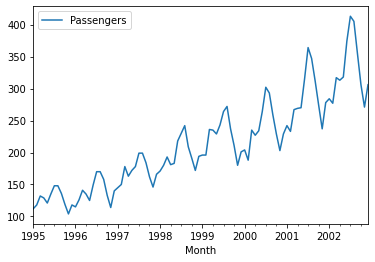

In [ ]:
# line plot
df.plot(x = 'Month')
pyplot.show()

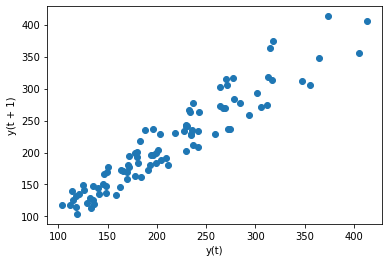

In [ ]:
# lag-plot
from pandas.plotting import lag_plot

df = pd.read_excel('/content/drive/MyDrive/Colab/Dataset/Forecasting/Airlines+Data.xlsx', header=0, index_col=0,parse_dates=True)
lag_plot(df)
pyplot.show()

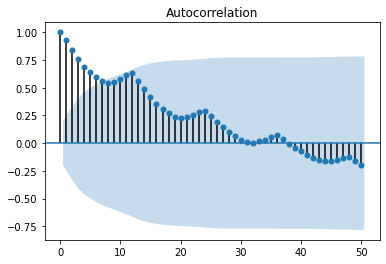

In [ ]:
# Autocorrelation 
from statsmodels.graphics.tsaplots import plot_acf

series = pd.read_excel('/content/drive/MyDrive/Colab/Dataset/Forecasting/Airlines+Data.xlsx', header=0, index_col=0, parse_dates=True)
plot_acf(series, lags = 50)
pyplot.show()

In [ ]:
airlines=pd.read_excel('/content/drive/MyDrive/Colab/Dataset/Forecasting/Airlines+Data.xlsx')
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
month=pd.DataFrame(month)
months=pd.DataFrame(np.tile(month,(8,1)))
Airlines=pd.concat([airlines,months],axis=1)
Airlines.columns=['Month','Passengers','months']

In [ ]:
month_dummies=pd.get_dummies(Airlines['months'])
Airlines=pd.concat([Airlines,month_dummies],axis=1)
Airlines['t']=np.arange(1,97)
Airlines['t_sq']=Airlines['t']*Airlines['t']
Airlines['log_passengers']=np.log(Airlines['Passengers'])

In [ ]:
Airlines.head()

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_sq,log_passengers
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


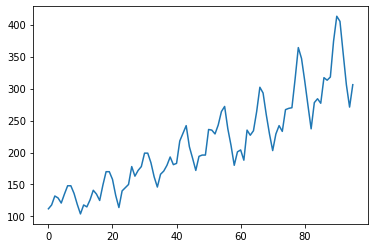

In [ ]:
Train=Airlines[0:85]
Test=Airlines[85:]
plt.plot(Airlines.iloc[:,1])
Test.set_index(np.arange(1,12),inplace=True)

In [ ]:
########## Linear ##############
import statsmodels.formula.api as smf
lin_model=smf.ols('Passengers~t',data=Train).fit()
predict_lin=lin_model.predict(Test['t'])
error_lin=Test['Passengers']-predict_lin
rmse_lin=np.sqrt(np.mean(error_lin**2))
rmse_lin# 55.67

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


55.674170015416244

In [ ]:
############ Exponential ############
exp_model=smf.ols('log_passengers~t',data=Train).fit()
predict_exp=exp_model.predict(Test['t'])
error_exp=Test['Passengers']-predict_exp
rmse_exp=np.sqrt(np.mean(error_exp**2))
rmse_exp# 329.69

329.69175113922927

In [ ]:
########## Quadratic ##############
import statsmodels.formula.api as smf
quad_model=smf.ols('Passengers~t+t_sq',data=Train).fit()
predict_quad=quad_model.predict(Test[['t','t_sq']])
error_quad=Test['Passengers']-predict_quad
rmse_quad=np.sqrt(np.mean(error_quad**2))
rmse_quad# 50.65

50.659545776501325

In [ ]:
########## Additive Seasonality ##############
import statsmodels.formula.api as smf
add_sea_model=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
predict_add_sea=add_sea_model.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
error_add_sea=Test['Passengers']-predict_add_sea
rmse_add_sea=np.sqrt(np.mean(error_add_sea**2))
rmse_add_sea# 134.344

134.34479910432762

In [ ]:
######### Additive Seasonality Quadratic ###########
add_sea_quad_model=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+t+t_sq',data=Train).fit()
predict_add_sea_quad=add_sea_quad_model.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']])
error_add_sea_quad=Test['Passengers']-predict_add_sea_quad
rmse_add_sea_quad=np.sqrt(np.mean(error_add_sea_quad**2))
rmse_add_sea_quad# 27.412


27.412714961199587

In [ ]:
##########  Mutiplicative Seasonality ##################
import statsmodels.formula.api as smf
mul_sea_model=smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
predict_mul_sea=mul_sea_model.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
error_mul_sea=Test['Passengers']-predict_mul_sea
rmse_mul_sea=np.sqrt(np.mean(error_mul_sea**2))
rmse_mul_sea# 330.19


330.1926780196679

In [ ]:
########### Multiplicative Additive Seasonality #################
import statsmodels.formula.api as smf
mul_add_sea_model=smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
predict_mul_add_sea=mul_add_sea_model.predict(Test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
error_mul_add_sea=Test['Passengers']-predict_mul_add_sea
rmse_mul_add_sea=np.sqrt(np.mean(error_mul_add_sea**2))
rmse_mul_add_sea# 329.66


329.66032649959925

In [ ]:
data={'model':['lin_model','exp_model','quad_model','add_sea','add_sea_quad','mul_sea','mul_add_sea'],'rmse_val':[rmse_lin,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,rmse_mul_add_sea]}
rmse_table=pd.DataFrame(data)
rmse_table


,model,rmse_val
0,lin_model,55.674170
1,exp_model,329.691751
2,quad_model,50.659546
3,add_sea,134.344799
4,add_sea_quad,27.412715
5,mul_sea,330.192678
6,mul_add_sea,329.660326


### Additive Seasonality Quadratic is having least rmse So Additive Seasonality Quadratic model is the best model


# Coco cola

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
cocacola=pd.read_excel('/content/drive/MyDrive/Colab/Dataset/Forecasting/CocaCola_Sales_Rawdata.xlsx')
quarters=['Q1','Q2','Q3','Q4']
quarters=pd.DataFrame(quarters)
Quarters=pd.DataFrame(np.tile(quarters,(11,1)))
Cocacola=pd.concat([cocacola,Quarters],axis=1)
Cocacola=Cocacola.dropna()
Cocacola.columns=['Quarter','Sales','quarters']


In [ ]:
Quarter_dummies=pd.get_dummies(Cocacola['quarters'])
Cocacola=pd.concat([Cocacola,Quarter_dummies],axis=1)
Cocacola['t']=np.arange(1,43)
Cocacola['t_sq']=Cocacola['t']*Cocacola['t']
Cocacola['log_sales']=np.log(Cocacola['Sales'])


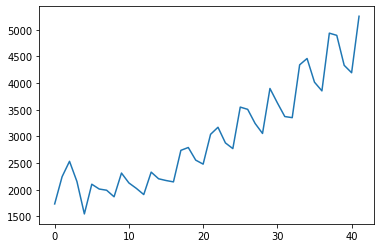

In [ ]:
Train=Cocacola[0:30]
Test=Cocacola[30:]
plt.plot(Cocacola.iloc[:,1])
Test.set_index(np.arange(1,13),inplace=True)


In [ ]:
############### Linear Model ###################
import statsmodels.formula.api as smf
lin_model=smf.ols('Sales~t',data=Train).fit()
predict_lin=lin_model.predict(Test['t'])
error_lin=Test['Sales']-predict_lin
rmse_lin=np.sqrt(np.mean(error_lin**2))
rmse_lin#714.01


714.0144483281302

In [ ]:
############### Exponential Model ###################
import statsmodels.formula.api as smf
exp_model=smf.ols('log_sales~t',data=Train).fit()
predict_exp=exp_model.predict(Test['t'])
error_exp=Test['Sales']-predict_exp
rmse_exp=np.sqrt(np.mean(error_exp**2))
rmse_exp#4252.188


4252.188990972336

In [ ]:
#############  Quadratic Model #################
quad_model=smf.ols('Sales~t+t_sq',data=Train).fit()
predict_quad=quad_model.predict(Test[['t','t_sq']])
error_quad=Test['Sales']-predict_quad
rmse_quad=np.sqrt(np.mean(error_quad**2))
rmse_quad#646.27


646.2715428311276

In [ ]:
############# Additive Seasonality #############
add_sea_model=smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
predict_add_sea=add_sea_model.predict(Test[['Q1','Q2','Q3','Q4']])
error_add_sea=Test['Sales']-predict_add_sea
rmse_add_sea=np.sqrt(np.mean(error_add_sea**2))
rmse_add_sea#1778.006


1778.006546794137

In [ ]:
############ Additive Seasonality Quadratic ###########
add_sea_quad_model=smf.ols('Sales~Q1+Q2+Q3+Q4+t+t_sq',data=Train).fit()
predict_add_sea_quad=add_sea_quad_model.predict(Test[['Q1','Q2','Q3','Q4','t','t_sq']])
error_add_sea_quad=Test['Sales']-predict_add_sea_quad
rmse_add_sea_quad=np.sqrt(np.mean(error_add_sea_quad**2))
rmse_add_sea_quad#586.05


586.0533067870399

In [ ]:
############# Multiplicative Seasonality #############
mul_sea_model=smf.ols('log_sales~Q1+Q2+Q3+Q4',data=Train).fit()
predict_mul_sea=mul_sea_model.predict(Test[['Q1','Q2','Q3','Q4']])
error_mul_sea=Test['Sales']-predict_mul_sea
rmse_mul_sea=np.sqrt(np.mean(error_mul_sea**2))
rmse_mul_sea#4252.63



4252.638677789394

In [ ]:
############### Multiplicative Additive Seasonality ############
mul_add_sea_model=smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data=Train).fit()
predict_mul_add_sea=mul_add_sea_model.predict(Test[['t','Q1','Q2','Q3','Q4']])
error_mul_add_sea=Test['Sales']-predict_mul_add_sea
rmse_mul_add_sea=np.sqrt(np.mean(error_mul_add_sea**2))
rmse_mul_add_sea#4252.18


4252.185655793222

In [ ]:
data={'model':['lin_model','exp_model','quad_model','add_sea','add_sea_quad','mul_sea','mul_add_sea'],'rmse_val':[rmse_lin,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,rmse_mul_add_sea]}
rmse_table=pd.DataFrame(data)
rmse_table


,model,rmse_val
0,lin_model,714.014448
1,exp_model,4252.188991
2,quad_model,646.271543
3,add_sea,1778.006547
4,add_sea_quad,586.053307
5,mul_sea,4252.638678
6,mul_add_sea,4252.185656


### Additive Seasonality Quadratic is having least rmse So Additive Seasonality Quadratic model is the best model
